# Name : Mayuri Mahesh Gade
## Assignement No 09
### PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.stats import zscore

In [2]:
# Load the dataset
wine_df = pd.read_csv('wine.csv')  # Replace with the correct path

In [3]:
# Preview the data
wine_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Task 1: Exploratory Data Analysis (EDA)

In [4]:
# Basic Info
print(wine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [5]:
# Descriptive statistics
print(wine_df.describe())

             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [6]:
# Check for missing values
print(wine_df.isnull().sum())

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [7]:
pip install --upgrade pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


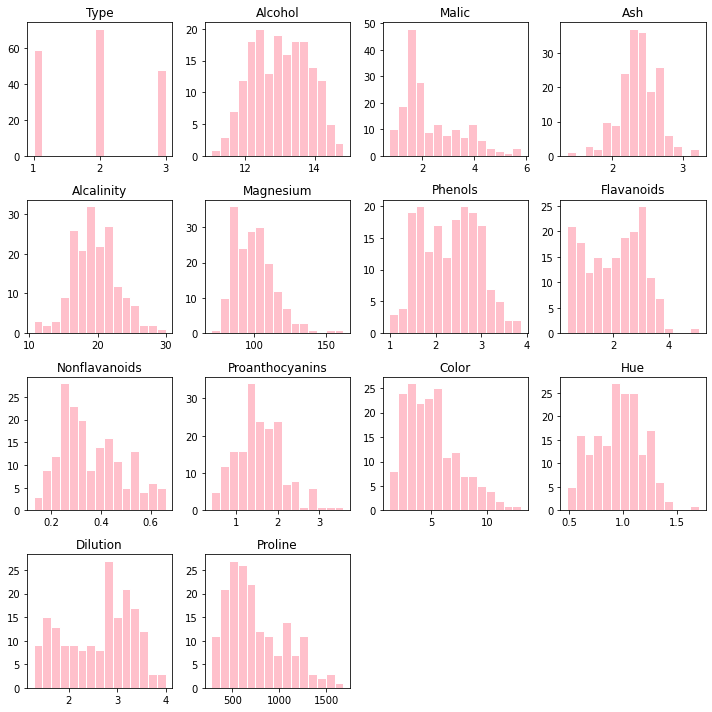

In [8]:
# Create histograms using Matplotlib directly
wine_df_columns = wine_df.columns

plt.figure(figsize=(10, 10))
for i, column in enumerate(wine_df_columns, 1):
    plt.subplot(4, 4, i)  # Adjust subplot grid according to the number of columns
    plt.hist(wine_df[column], bins=15, color='pink', edgecolor='white')
    plt.title(column)

plt.tight_layout()  # Ensure plots do not overlap
plt.show()

In [9]:
pip install --upgrade pandas seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


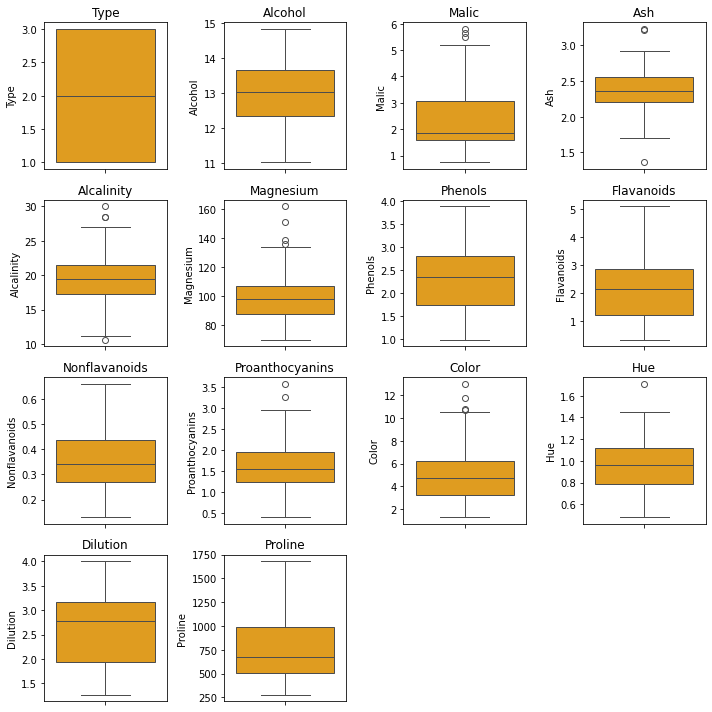

In [10]:
# Plot boxplots manually using Seaborn for each feature
plt.figure(figsize=(10, 10))
for i, column in enumerate(wine_df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust based on the number of features
    sns.boxplot(data=wine_df[column], color='orange')
    plt.title(column)

plt.tight_layout()
plt.show()

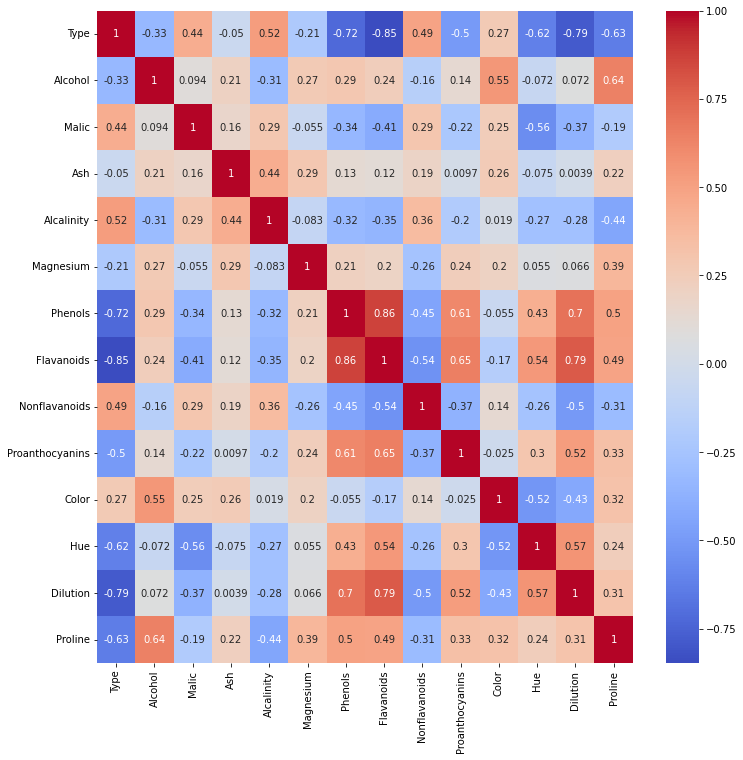

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Task 2: Dimensionality Reduction with PCA

In [12]:
# Standardize the data (mean=0, std=1)
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

In [13]:
# Apply PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)

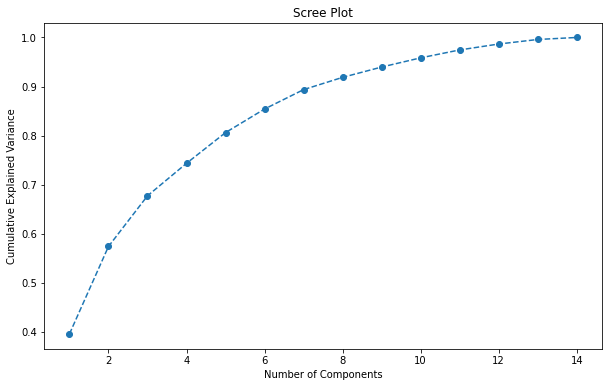

In [14]:
# Scree plot
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [15]:
# Choose number of components based on explained variance
optimal_components = np.argmax(explained_variance >= 0.90) + 1  # 90% variance threshold
print(f"Optimal number of components: {optimal_components}")

Optimal number of components: 8


In [16]:
# Transform data using the optimal number of components
pca = PCA(n_components=optimal_components)
wine_pca = pca.fit_transform(wine_scaled)

### Task 3: Clustering with Original Data

In [17]:
# Apply KMeans to the original data
kmeans_original = KMeans(n_clusters=3, random_state=42)  # Set the number of clusters based on your dataset
wine_df['cluster_original'] = kmeans_original.fit_predict(wine_scaled)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


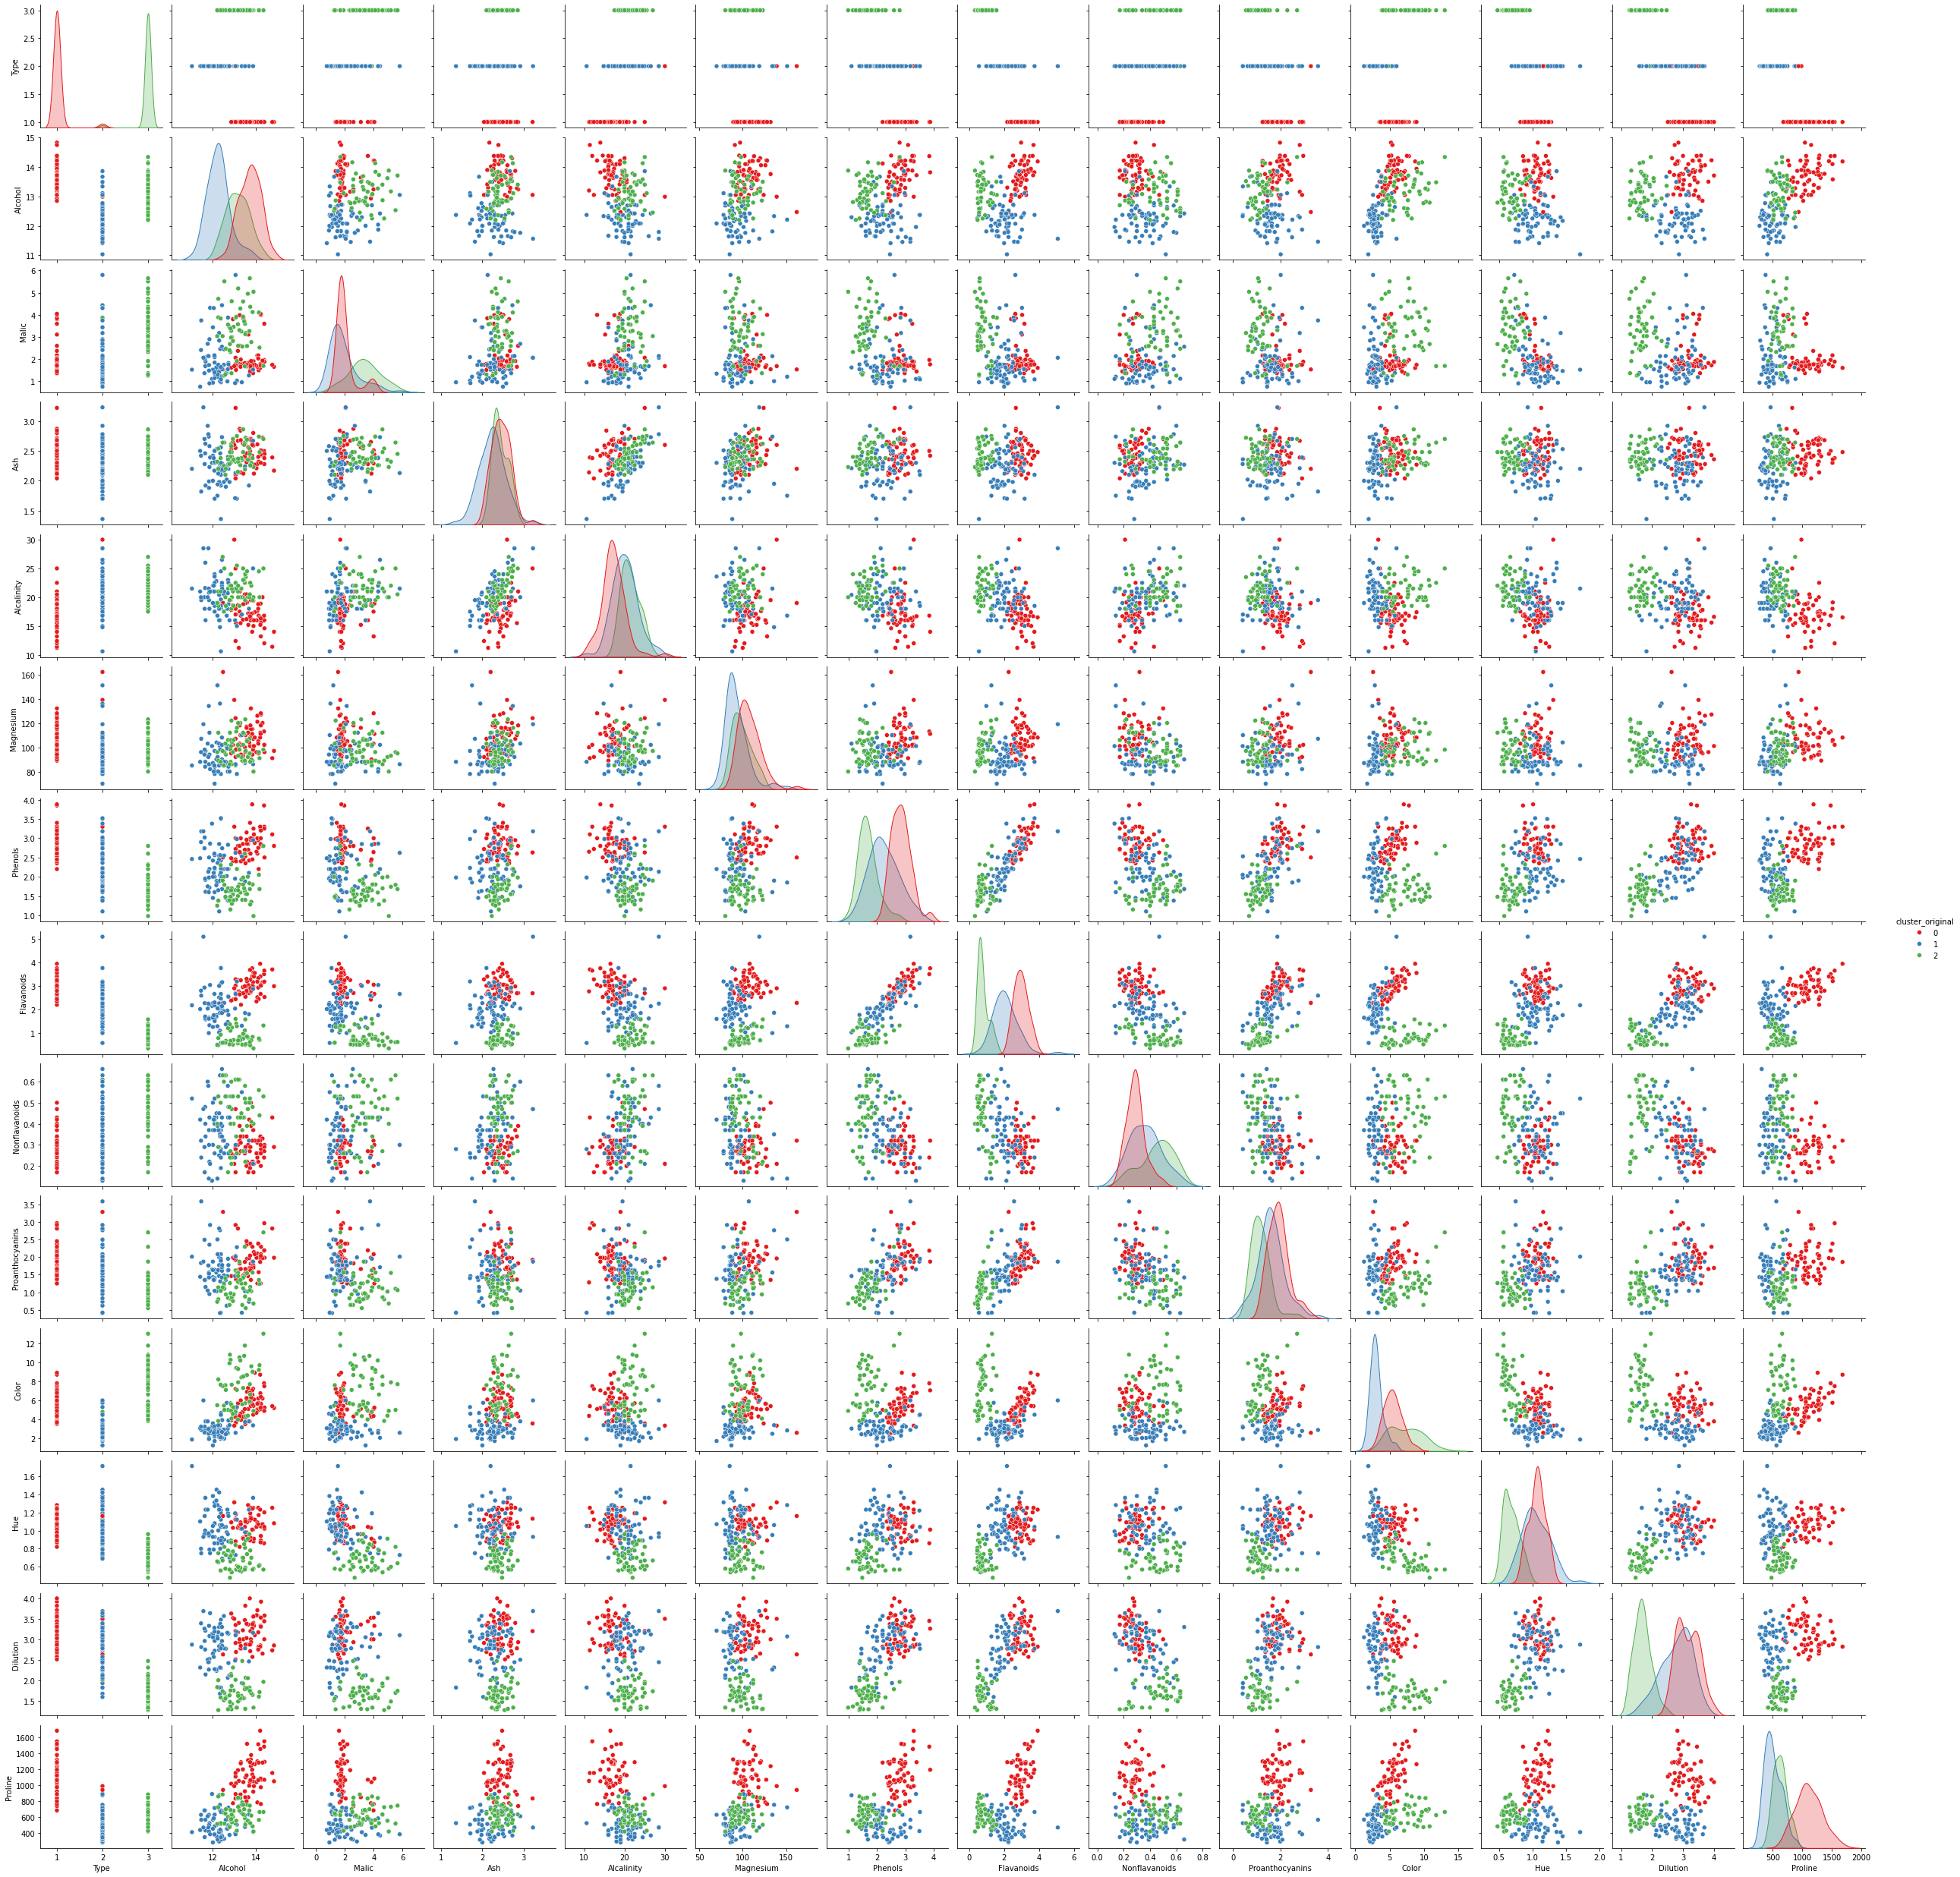

In [18]:
# Visualize clusters (Pairplot)
sns.pairplot(wine_df, hue='cluster_original', palette='Set1')
plt.show()

In [19]:
# Evaluate clustering performance
sil_original = silhouette_score(wine_scaled, wine_df['cluster_original'])
db_original = davies_bouldin_score(wine_scaled, wine_df['cluster_original'])

print(f'Silhouette Score (Original Data): {sil_original}')
print(f'Davies-Bouldin Index (Original Data): {db_original}')


Silhouette Score (Original Data): 0.30773604383565206
Davies-Bouldin Index (Original Data): 1.3163957434114109


### Task 4: Clustering with PCA Data

In [21]:
# Apply KMeans to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
wine_df['cluster_pca'] = kmeans_pca.fit_predict(wine_pca)

C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\HP\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


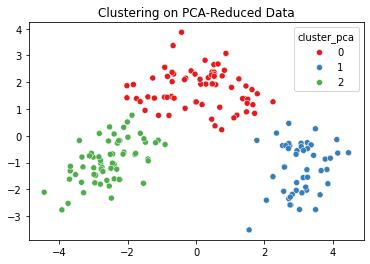

In [22]:
# Visualize PCA-based clusters
sns.scatterplot(x=wine_pca[:, 0], y=wine_pca[:, 1], hue=wine_df['cluster_pca'], palette='Set1')
plt.title('Clustering on PCA-Reduced Data')
plt.show()

In [23]:
# Evaluate PCA clustering performance
sil_pca = silhouette_score(wine_pca, wine_df['cluster_pca'])
db_pca = davies_bouldin_score(wine_pca, wine_df['cluster_pca'])

print(f'Silhouette Score (PCA Data): {sil_pca}')
print(f'Davies-Bouldin Index (PCA Data): {db_pca}')

Silhouette Score (PCA Data): 0.3402428666857789
Davies-Bouldin Index (PCA Data): 1.1903042789637734


### Task 5: Comparison and Analysis

In [24]:
# Compare Silhouette and Davies-Bouldin Scores
print(f"Silhouette Score - Original Data: {sil_original}, PCA Data: {sil_pca}")
print(f"Davies-Bouldin Index - Original Data: {db_original}, PCA Data: {db_pca}")

Silhouette Score - Original Data: 0.30773604383565206, PCA Data: 0.3402428666857789
Davies-Bouldin Index - Original Data: 1.3163957434114109, PCA Data: 1.1903042789637734


In [25]:
# Analyze the differences in clustering performance
if sil_pca > sil_original:
    print("PCA-based clustering has better performance based on Silhouette Score.")
else:
    print("Clustering on original data is better based on Silhouette Score.")

if db_pca < db_original:
    print("PCA-based clustering has lower Davies-Bouldin Index, indicating better separation between clusters.")
else:
    print("Original data clustering shows better separation between clusters.")

PCA-based clustering has better performance based on Silhouette Score.
PCA-based clustering has lower Davies-Bouldin Index, indicating better separation between clusters.


### Task 6: Conclusion and Insights

Summarize key findings based on the analysis above. You can conclude:

Whether PCA improves clustering performance.
When to use dimensionality reduction versus clustering directly on original data.